Imports and creating dataframe

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import numpy as np
sns.set_style()
palette = ["#7B3F45","#7D779D","#39BAB4","#50CCA4","#EFEE69"]
palette2 = ["#7B3F45","#874D63","#886082","#7D779D","#668EB0","#4AA5B8","#39BAB4","#50CCA4","#7EDC8E","#B4E777","#EFEE69"]

spot_10= pd.read_csv("2010.csv")
spot_11= pd.read_csv("2011.csv")
spot_12= pd.read_csv("2012.csv")
spot_13= pd.read_csv("2013.csv")
spot_14= pd.read_csv("2014.csv")
spot_15= pd.read_csv("2015.csv")
spot_16= pd.read_csv("2016.csv")
spot_17= pd.read_csv("2017.csv")
spot_18= pd.read_csv("2018.csv")
spot_19= pd.read_csv("2019.csv")

files = [spot_10, spot_11, spot_12, spot_13, spot_14, spot_15, spot_16, spot_17, spot_18, spot_19]

all_top_songs = pd.concat(files, ignore_index=True)

In [2]:
all_top_songs = all_top_songs.rename(columns={"Unnamed: 0":"ID"})

In [3]:
all_top_songs.head()

ID                 title      artist        top genre  year  bpm  nrgy  \
0   1      Hey, Soul Sister       Train       neo mellow  2010   97    89   
1   2  Love The Way You Lie      Eminem  detroit hip hop  2010   87    93   
2   3               TiK ToK       Kesha        dance pop  2010  120    84   
3   4           Bad Romance   Lady Gaga        dance pop  2010  119    92   
4   5  Just the Way You Are  Bruno Mars              pop  2010  109    84   

   dnce  dB  live  val  dur  acous  spch  pop  
0    67  -4     8   80  217     19     4   83  
1    75  -5    52   64  263     24    23   82  
2    76  -3    29   71  200     10    14   80  
3    70  -4     8   71  295      0     4   79  
4    64  -5     9   43  221      2     4   78

clean dataset

In [4]:
all_top_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         603 non-null    int64 
 1   title      603 non-null    object
 2   artist     603 non-null    object
 3   top genre  603 non-null    object
 4   year       603 non-null    int64 
 5   bpm        603 non-null    int64 
 6   nrgy       603 non-null    int64 
 7   dnce       603 non-null    int64 
 8   dB         603 non-null    int64 
 9   live       603 non-null    int64 
 10  val        603 non-null    int64 
 11  dur        603 non-null    int64 
 12  acous      603 non-null    int64 
 13  spch       603 non-null    int64 
 14  pop        603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.8+ KB


In [5]:
all_top_songs[all_top_songs.isnull().any(axis=1)]

Empty DataFrame
Columns: [ID, title, artist, top genre, year, bpm, nrgy, dnce, dB, live, val, dur, acous, spch, pop]
Index: []

# Questions

## 1. What is the most popular song in the dataset?

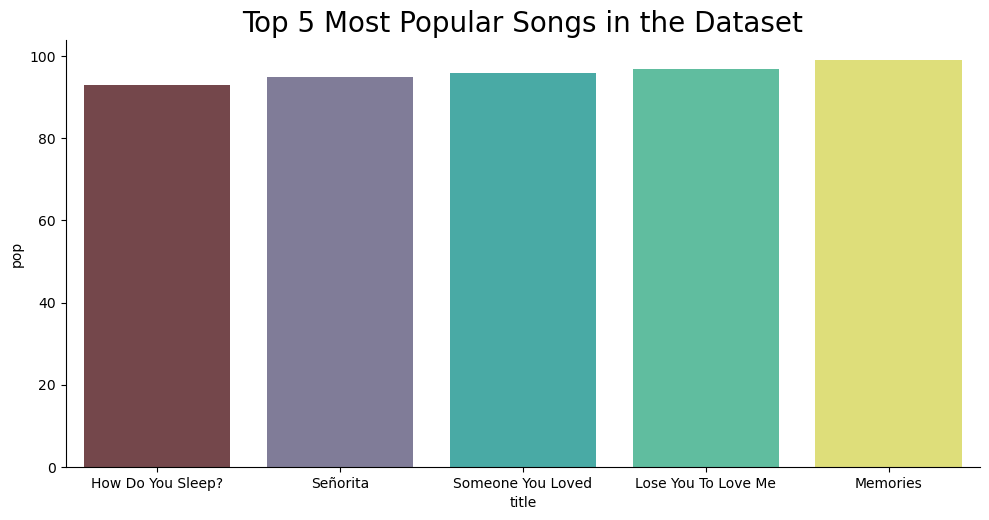

In [6]:
pop = all_top_songs['pop']
pop

top_pop = all_top_songs.sort_values(by=['pop']).tail(5)
# top_pop = all_top_songs.loc[all_top_songs['pop'].idxmax()]
top_pop
sns.catplot(data=top_pop, x='title', y='pop', kind='bar', aspect=2, palette = palette)
plt.title('Top 5 Most Popular Songs in the Dataset', fontsize = 20)
plt.show()

## Notes:
The most popular song is Memories by Maroon 5. Its popularity rating is 99. The next most popular song is Lose You To Love Me.

## 2. What artist has the most songs in the dataset?

In [7]:
artist = all_top_songs['artist'].value_counts()
artist

Katy Perry             17
Justin Bieber          16
Rihanna                15
Maroon 5               15
Lady Gaga              14
                       ..
Iggy Azalea             1
5 Seconds of Summer     1
Michael Jackson         1
Disclosure              1
Daddy Yankee            1
Name: artist, Length: 184, dtype: int64

## Notes:
The artist with the most songs is Katy Perry, who has 17 songs in the database.

## 3. What is the most popular genre of music in the dataset?

In [8]:
grouped_genre = all_top_songs.groupby(['top genre']).sum().reset_index()
genre = grouped_genre.sort_values(by=['pop']).tail(5)
genre

top genre     ID    year    bpm   nrgy   dnce    dB  live    val  \
33    electropop   6045   26223   1467    848    841   -89   211    571   
12      boy band   4115   30216   1742   1204    957   -64   228    909   
18  canadian pop  11586   68520   4131   2316   2167  -207   559   1917   
48           pop  19165  120903   7024   4098   4107  -336   973   3451   
25     dance pop  94622  658692  38745  23814  21573 -1707  6153  17889   

      dur  acous  spch    pop  
33   2764    184    86   1007  
12   3071    162   108   1045  
18   7064    678   333   2456  
48  13355   1060   409   4490  
25  73447   3523  2910  21047

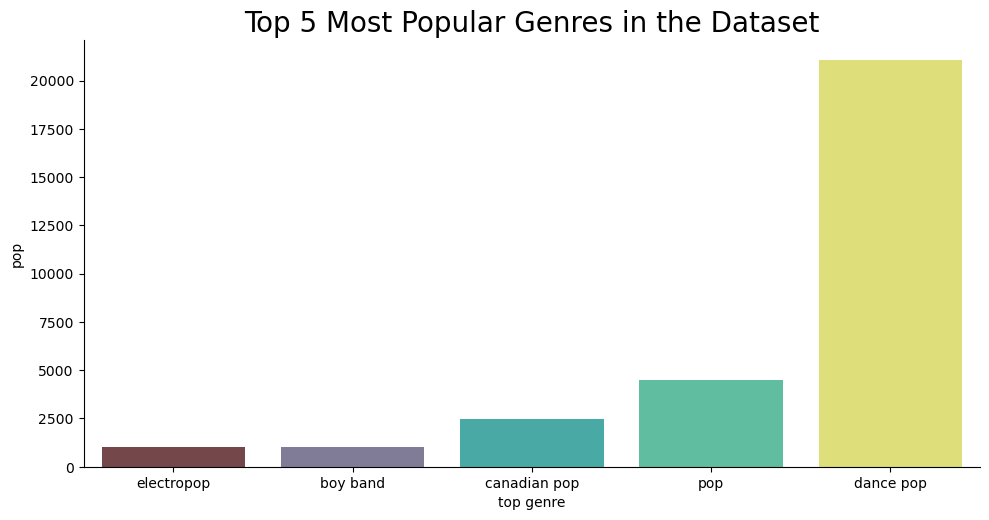

In [9]:
sns.catplot(data=genre, x='top genre', y='pop', kind='bar', aspect=2, palette = palette)
plt.title('Top 5 Most Popular Genres in the Dataset', fontsize = 20)
plt.show()

## Notes:
The most popular genre of music is dance pop.

## 4. Are there any songs in the dataset more than once?

In [10]:
all_top_songs["title"].duplicated().sum()

19

In [11]:
repeats = all_top_songs.loc[all_top_songs.duplicated(subset=["title"])]
repeats

ID                                            title             artist  \
54    55                             Just the Way You Are         Bruno Mars   
64    65                                        Marry You         Bruno Mars   
93    94         Written in the Stars (feat. Eric Turner)       Tinie Tempah   
95    96          Castle Walls (feat. Christina Aguilera)               T.I.   
152  153          We Are Never Ever Getting Back Together       Taylor Swift   
239  240  A Little Party Never Killed Nobody (All We Got)             Fergie   
295  296                                            Hello              Adele   
322  323                                            Sugar           Maroon 5   
363  364                                        The Hills         The Weeknd   
364  365                                    Love Yourself      Justin Bieber   
378  379                                         Stitches       Shawn Mendes   
396  397                                          Company      Justin Bieber   
403  404                            Runnin' (Lose It All)        Naughty Boy   
404  405                                             Here       Alessia Cara   
473  474                                        All I Ask              Adele   
510  511                                        I Like It            Cardi B   
541  542                                    Say Something  Justin Timberlake   
548  549                                       First Time               Kygo   
557  558                                Kissing Strangers               DNCE   

                     top genre  year  bpm  nrgy  dnce  dB  live  val  dur  \
54                         pop  2011  109    84    64  -5     9   43  221   
64                         pop  2011  145    83    62  -5    10   48  230   
93                   dance pop  2011   91    95    64  -4    18   57  220   
95                 atl hip hop  2011   80    86    45  -5    26   58  329   
152                        pop  2013   86    68    63  -6    12   75  193   
239                  dance pop  2014  130    62    76  -6     9   52  241   
295               british soul  2015  158    45    48  -6     9   29  295   
322                        pop  2015  120    79    75  -7     9   88  235   
363  canadian contemporary r&b  2016  113    56    58  -7    14   14  242   
364               canadian pop  2016  100    38    61 -10    28   52  234   
378               canadian pop  2016  150    75    75  -7     5   76  207   
396               canadian pop  2016   95    80    59  -5     8   43  208   
403             tropical house  2016  139    85    32  -6    48    8  213   
404  canadian contemporary r&b  2016  120    82    38  -4     8   33  199   
473               british soul  2017  142    28    59  -5    15   34  272   
510                        pop  2018  136    73    82  -4    37   65  253   
541                  dance pop  2018   97    63    71  -7     8   37  279   
548                        edm  2018   90    59    63  -7    10   68  194   
557                  dance pop  2018  120    74    77  -6     9   86  202   

     acous  spch  pop  
54       2     4   78  
64      33     4   73  
93       6     7   52  
95       7    39   49  
152      1     9   75  
239      1    18   65  
295     34     3   73  
322      6     3   66  
363      7     5   84  
364     84    44   83  
378      2     7   78  
396     13     6   72  
403      1     8   69  
404      8    10   68  
473     88     3   71  
510     10    13   85  
541     10     8   74  
548     20    11   71  
557      5     4   66

## Notes:
There are 19 songs that appear in the database more than once. This is because the song was popular in more than one year.

## 5. Is there a relationship between popularity and danceability?

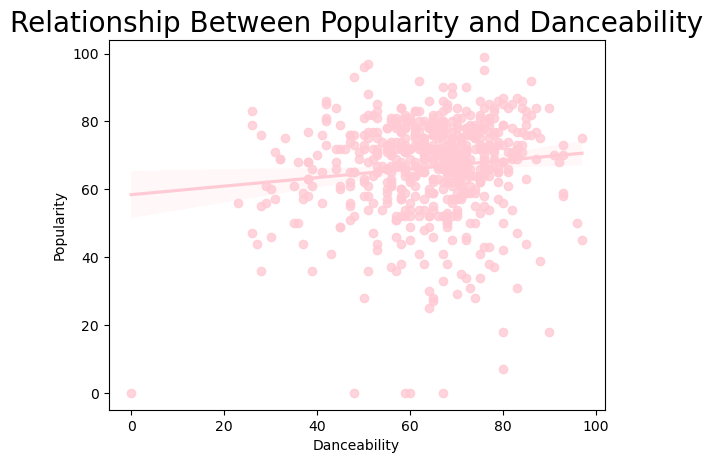

In [12]:
sns.regplot(data=all_top_songs, x='dnce', y='pop', color="#FFCAD4")
plt.title('Relationship Between Popularity and Danceability', fontsize = 20)
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.show()

## Notes:
There is not a strong relationship between popularity and danceability. The scatterplot shows a slight positive correlation.

## 6. Does having a higher bpm lead to having a higher energy score?

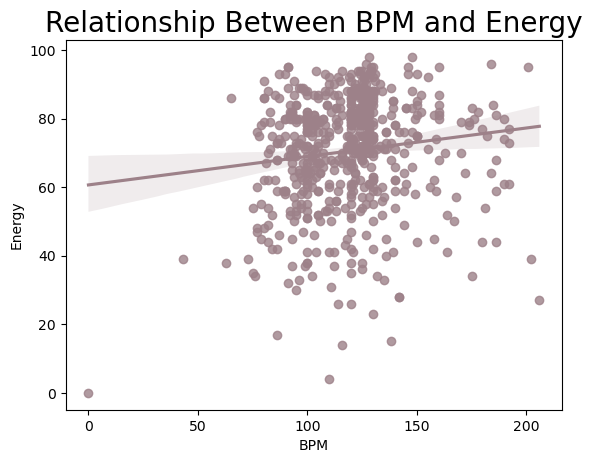

In [13]:
sns.regplot(data=all_top_songs, x='bpm', y='nrgy', color="#9D8189")
plt.title('Relationship Between BPM and Energy', fontsize = 20)
plt.xlabel("BPM")
plt.ylabel("Energy")
plt.show()

## Notes
Having higher BPM does not generally lead to having a higher energy score. The scatterplot shows a slight positive correlation but it is very weak.

## 7. Which genre has the highest energy score?

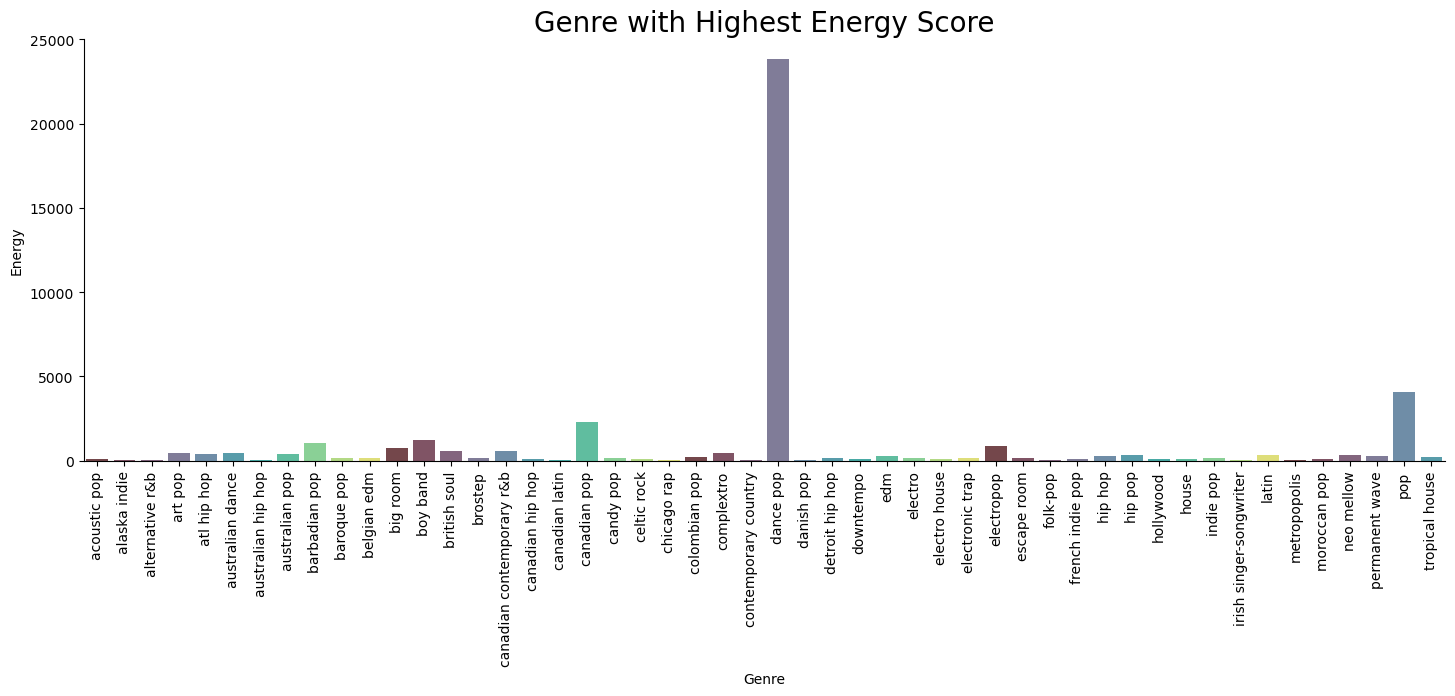

In [14]:
sns.catplot(data=grouped_genre, x='top genre', y='nrgy', kind='bar', aspect=3, palette = palette2)
plt.xticks(rotation=90)
plt.title('Genre with Highest Energy Score', fontsize = 20)
plt.xlabel("Genre")
plt.ylabel("Energy")
plt.show()

## Notes:
Dance Pop has the highest energy out of all of the genres. No other genre comes close to its energy scores.

# Extra Credit

## Export the combined dataset into a CSV called top_spotify_songs.csv

In [15]:
all_top_songs.to_csv('top_spotify_songs.csv')

## 1. What percentage of songs may have been recorded live? (Consider anything above 50 in the live column to be recorded live)

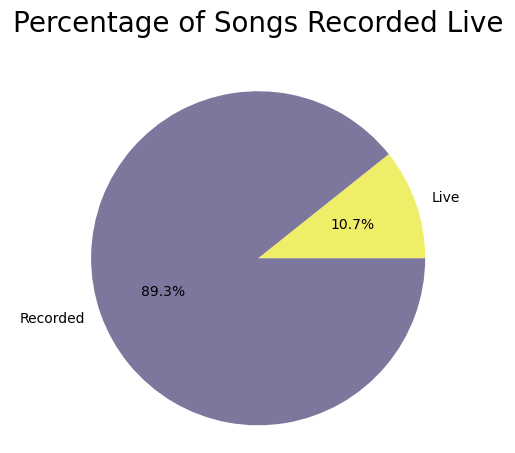

In [16]:
live = all_top_songs[all_top_songs["live"] > 50].live.sum()
recorded = all_top_songs[all_top_songs["live"] <= 50].live.sum()

songs_live = [live, recorded]
Label = ['Live', 'Recorded'] 
colors = ['#EFEE69', '#7D779D']

plt.pie(songs_live, labels = Label, colors = colors, autopct = '%1.1f%%')
plt.title('Percentage of Songs Recorded Live', fontsize = 20, pad=30)
plt.axis('equal')
plt.show()

## Notes:
10.7 percent of songs had a live score above 50.

## 2. What percentage of songs were acoustic? (Consider anything above 50 in the acoustic column to be acoustic)

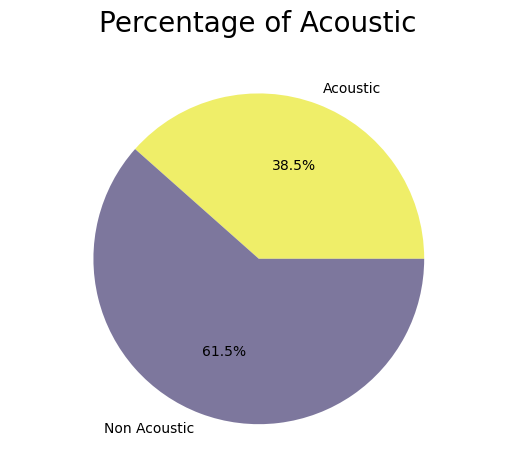

In [17]:
acoustic = all_top_songs[all_top_songs["acous"] > 50].acous.sum()
non_acoustic = all_top_songs[all_top_songs["acous"] <= 50].acous.sum()

songs_acous = [acoustic, non_acoustic]
Label = ['Acoustic', 'Non Acoustic'] 
colors = ['#EFEE69', '#7D779D']

plt.pie(songs_acous, labels = Label, colors = colors, autopct = '%1.1f%%')
plt.title('Percentage of Acoustic', fontsize = 20, pad=30)
plt.axis('equal')
plt.show()

## Notes:
38.5 percent of songs had an acoustic score above 50.

## 3. Which yearâ€™s songs have the highest amount of spoken word in the song?

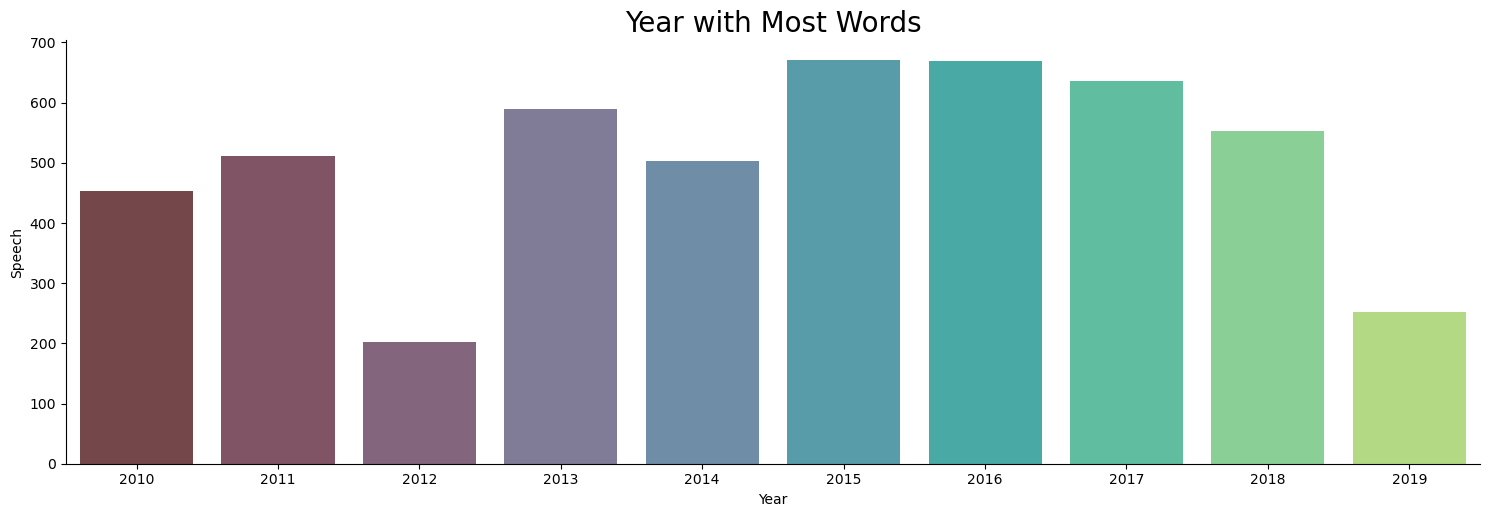

In [19]:
grouped_year = all_top_songs.groupby(['year']).sum().reset_index()
sns.catplot(data=grouped_year, x='year', y='spch', kind='bar', aspect=3, palette = palette2)
plt.title('Year with Most Words', fontsize = 20)
plt.xlabel("Year")
plt.ylabel("Speech")
plt.show()

## Notes:
The year with the highest amount of spoken words is 2015 with a score of 670. 2016 was second with a score of 669. 